## CBC example

In [1]:
from optiwindnet.importer import load_repository
from optiwindnet.svg import svgplot
from optiwindnet.mesh import make_planar_embedding
from optiwindnet.interarraylib import G_from_S
from optiwindnet.heuristics import EW_presolver
from optiwindnet.MILP import solver_factory, ModelOptions

### Initialize Walney Extension

In [2]:
locations = load_repository()

In [3]:
L = locations.walneyext
capacity = 5

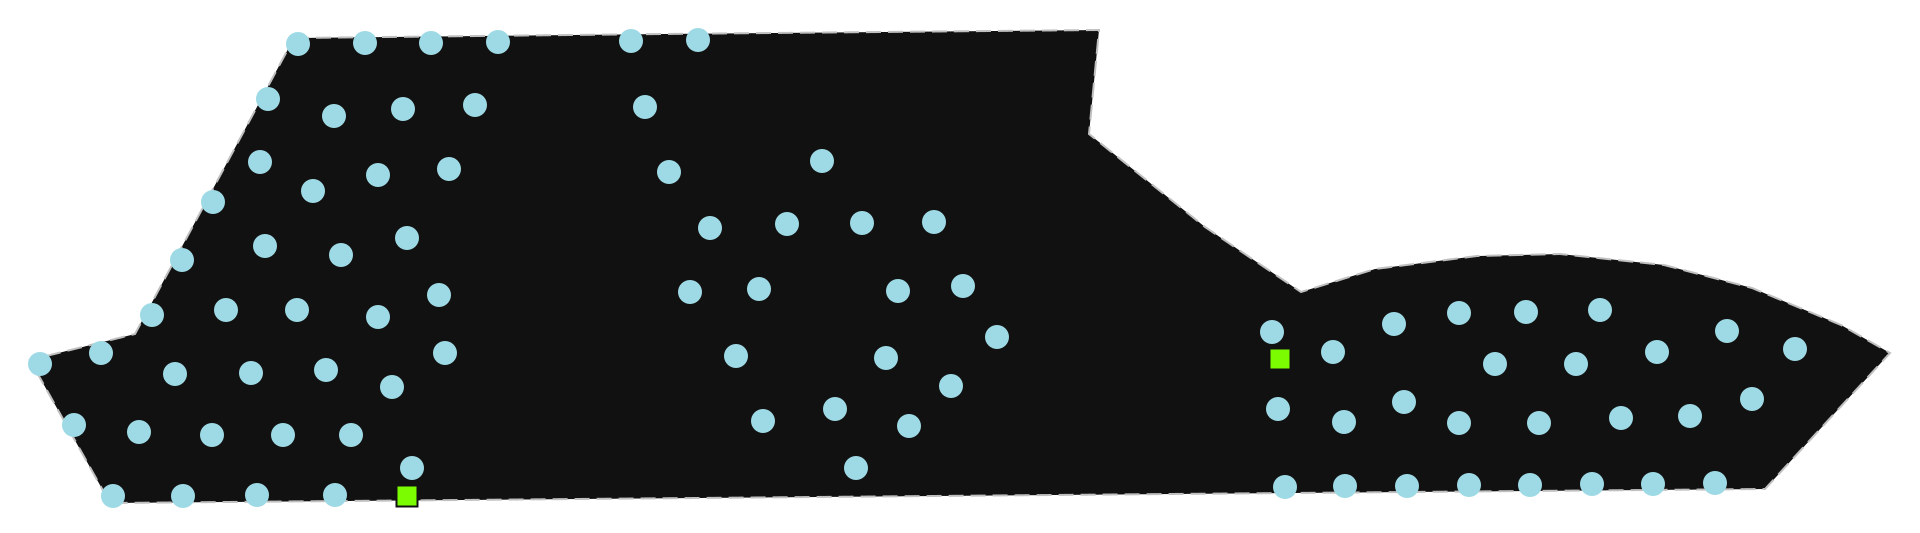

In [4]:
svgplot(L)

### Optimize Walney Extension

In [5]:
P, A = make_planar_embedding(L)

Initial heuristic solution to warm-start the solver:

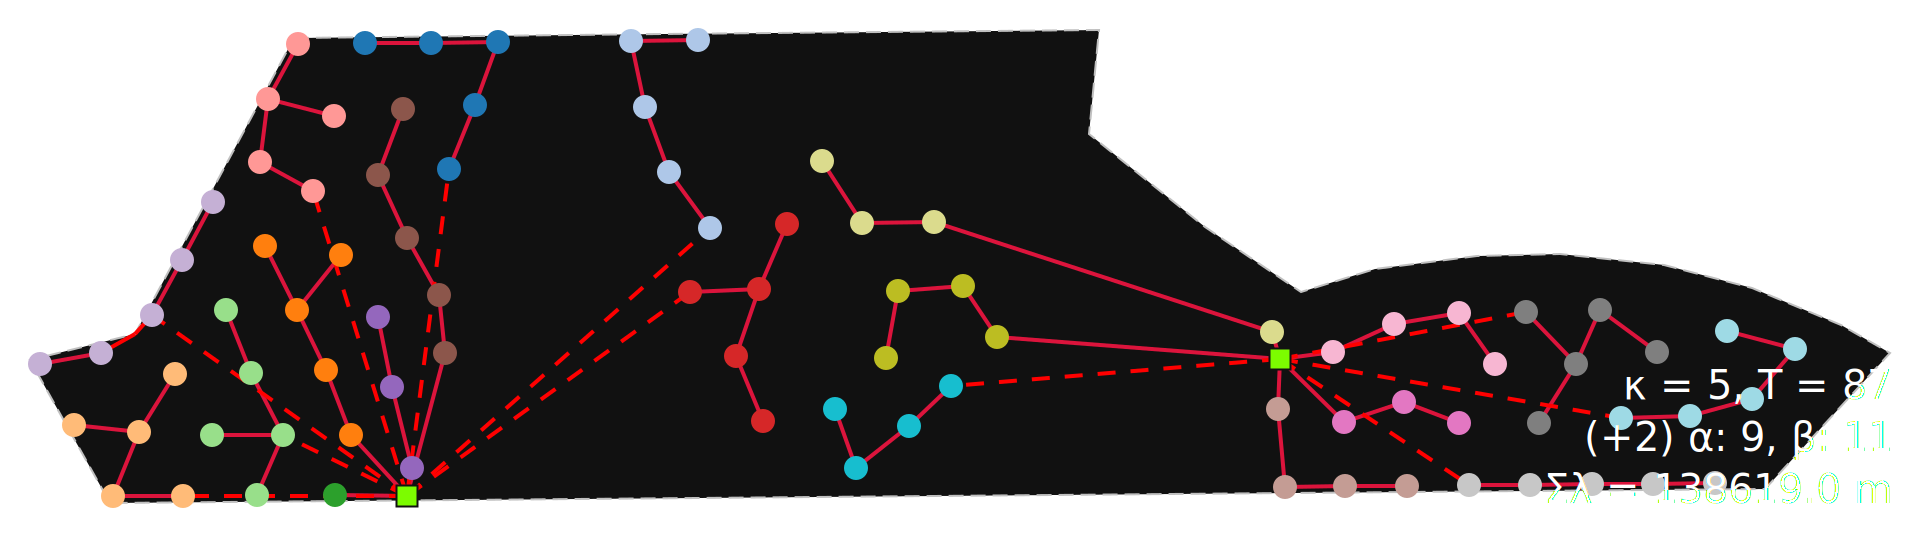

In [6]:
Sʹ = EW_presolver(A, capacity=capacity)
Gʹ = G_from_S(Sʹ, A)
svgplot(Gʹ)

In [7]:
solver = solver_factory('cbc')

In [8]:
solver.set_problem(
    P, A,
    capacity=Sʹ.graph['capacity'],
    model_options=ModelOptions(
        topology="branched",
        feeder_route="segmented",
        feeder_limit="unlimited",
    ),
    warmstart=Sʹ,
)

In [9]:
solver.solve(
    mip_gap=0.005,
    time_limit=150,
    verbose=True,
)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: Jan  1 1970 

command line - C:\Users\s213184\programs\cbc_julia_mingw32_2.10.8\bin\cbc.exe -threads 16 -timeMode elapsed -nodeStrategy downFewest -Dins on -VndVariableNeighborhoodSearch on -Rens on -Rins on -pivotAndComplement off -proximitySearch off -gomoryCuts on -mixedIntegerRoundingCuts on -flowCoverCuts on -cliqueCuts off -twoMirCuts off -knapsackCuts off -probingCuts off -zeroHalfCuts off -liftAndProjectCuts off -residualCapacityCuts off -seconds 150 -ratioGap 0.005 -printingOptions all -import C:\Users\s213184\tmp\tmphmzvahi5.pyomo.lp -mipstart \Users\s213184\tmp\tmpz4j7e2wb.cbc.soln -stat=1 -solve -solu C:\Users\s213184\tmp\tmphmzvahi5.pyomo.soln (default strategy 1)
threads was changed from 0 to 16
Option for timeMode changed from cpu to elapsed
Option for nodeStrategy changed from fewest to downfewest
Option for Dins changed from off to on
Option for VndVariableNeighborhoodSearch changed from off to on
Option for 

SolutionInfo(runtime=150.95, bound=127497.9, objective=129552.74141019, relgap=0.015861041517322816, termination='maxTimeLimit')

In [10]:
S, G = solver.get_solution()

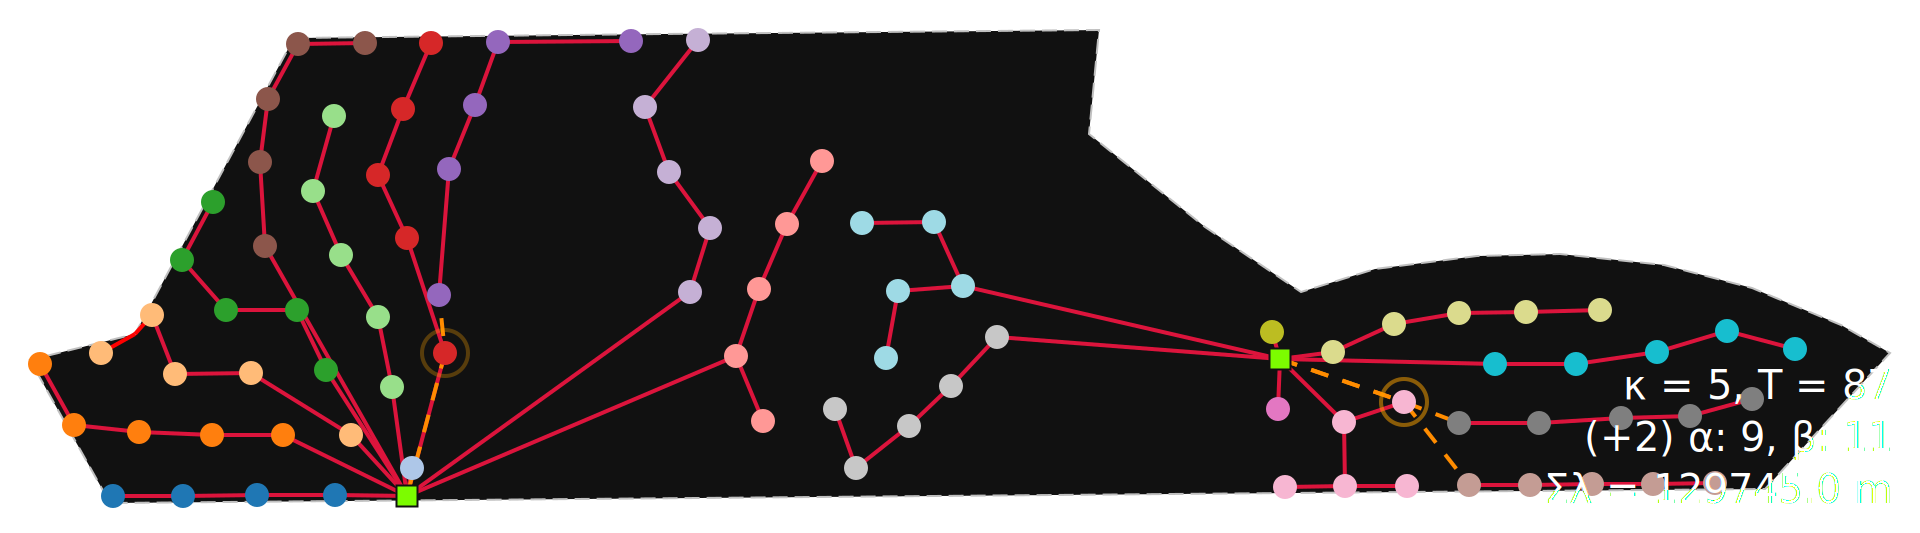

In [11]:
svgplot(G)